In [1]:
# tools for handling files
import sys
import os

# pandas/numpy for handling data
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from ptitprince import PtitPrince as pt

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# for reading individual telomere length data from files
from ast import literal_eval

# for grabbing individual cells
import more_itertools

# my module containing functions for handling/visualizing/analyzing telomere length/chr rearrangement data
import telomere_methods_rad_patient as telo_mrp

In [3]:
import importlib
# importlib.reload(telo_mrp)
%load_ext autoreload
%autoreload 2

In [16]:
%reload_ext autoreload

### Extracting telomere length data from all radiation therapy patients

In [74]:
all_patients_dict = telo_mrp.generate_dictionary_from_TeloLength_and_Chr_aberr_Data('..')

SW9A non irrad.xlsx data extraction in progress..
BJ1 for SW9_.xlsx data extraction in progress..
SW11A non irrad.xlsx data extraction in progress..
BJ1 for SW15_.xlsx data extraction in progress..
SW6A non irrad.xlsx data extraction in progress..
SW6A irrad @ 4 Gy.xlsx data extraction in progress..
SW8B.xlsx data extraction in progress..
SW14A irrad @ 4 Gy.xlsx data extraction in progress..
SW8A irrad @ 4 Gy.xlsx data extraction in progress..
SW5A irrad @ 4 Gy.xlsx data extraction in progress..
SW8C.xlsx data extraction in progress..
SW1A non irrad.xlsx data extraction in progress..
BJ1 for SW11_.xlsx data extraction in progress..
SW16A non irrad.xlsx data extraction in progress..
BJ1 for SW13_.xlsx data extraction in progress..
BJ-hTERT for SW9_.xlsx data extraction in progress..
BJ1 for SW14_.xlsx data extraction in progress..
SW9B.xlsx data extraction in progress..
BJ1 for SW8_.xlsx data extraction in progress..
SW_1_ok_3_C_.xlsx data extraction in progress..
SW3A irrad @ 4 Gy.xlsx

#### Saving all patients dataframe data to csv 

In [254]:
# # saving data to csv file for later retrieval

# copy_all_patients_df = all_patients_df
# copy_all_patients_df['telo data'] = copy_all_patients_df['telo data'].apply(lambda row: row.tolist())
# copy_all_patients_df.to_csv('copy_all_patients_df.csv')

In [2]:
# # retrieving data

all_patients_df2 = pd.read_csv('copy_all_patients_df.csv', index_col=0)
all_patients_df2['telo data'] = all_patients_df2['telo data'].apply(lambda row: np.array(literal_eval(row)))
all_patients_df = all_patients_df2

In [94]:
all_patients_df_origin = telo_mrp.generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict)
# all_patients_df = telo_mrp.calculate_apply_teloQuartiles_dataframe(all_patients_df_origin)

To display graphs pass the value "yes graphs" to the function otherwise default option="no graphs"


### Generating different dataframes (df) from telomere data data for different analyses

#### Df with all individual telomere length data & means

In [3]:
sns.set_style(style="darkgrid")

all_patients_df = telo_mrp.calculate_apply_teloQuartiles_dataframe(all_patients_df)
all_patients_df['Q1'] = all_patients_df['Q1'].astype('float64')
all_patients_df['Q2-3'] = all_patients_df['Q2-3'].astype('float64')
all_patients_df['Q4'] = all_patients_df['Q4'].astype('float64')

all_patients_df = all_patients_df.drop(['cell data'], axis=1)

In [4]:
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,"[97.13966471267643, 139.37430154427489, 142.54...",chr data,IT WORKS PEGGY <333,84.796738,1195.0,2214.0,1191.0
1,1,2 irrad @ 4 Gy,"[99.25139655425636, 72.85474853450732, 79.1899...",chr data,IT WORKS PEGGY <333,90.975987,724.0,2343.0,1533.0
2,1,3 B,"[129.87150825716523, 122.4804468116355, 63.351...",chr data,IT WORKS PEGGY <333,116.780229,231.0,1448.0,2921.0
3,1,4 C,"[90.80446918793666, 124.59217865321543, 62.296...",chr data,IT WORKS PEGGY <333,99.346663,372.0,2210.0,2018.0


#### Df with individual telos within quartiles melted into tidy data format

In [7]:
### MELT Q1, Q2-3, Q4 COLUMNS INTO ONE.. the relative Q && make new column Q freq counts for it
### relative Q refers to which quartile, ala Q1 <0.25, Q2-3 >0.25 & <0.75, Q4 > 0.75
### Q FREQ COUNTS: counts the number of individual telomeres for each timepoint within the quartiles established 
### by the non irradiated timepoint for each patient 

melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')

melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,"[97.13966471267643, 139.37430154427489, 142.54...",chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,"[99.25139655425636, 72.85474853450732, 79.1899...",chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,"[129.87150825716523, 122.4804468116355, 63.351...",chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,"[90.80446918793666, 124.59217865321543, 62.296...",chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


#### Df with timepoints as columns, and telomere length means for each patient timepoint  in rows

In [12]:
#make columns timepoints containing MEANS of telomeres

pivot_all_patients_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
pivot_all_patients_df = pivot_all_patients_df.drop(13)

print(pivot_all_patients_df.shape)
pivot_all_patients_df.head(4)

(14, 4)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,,,,
1,84.796738,90.975987,116.780229,99.346663
2,119.774143,133.199629,159.828115,108.915685
3,83.351204,87.295754,101.433049,95.669819
5,85.506373,113.096219,118.340987,97.832439


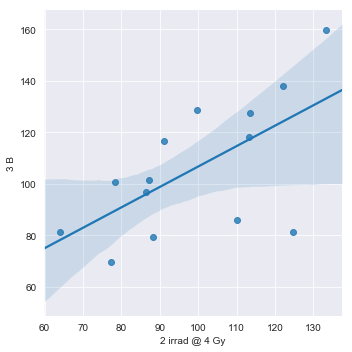

In [8]:
sns.lmplot(x='2 irrad @ 4 Gy', y='3 B', fit_reg=True, data=pivot_all_patients_df)

##### Linear regression between telomere length means pre-4 C vs. 4 C

In [21]:
### LINEAR REGRESSION BETWEEN ALL TELO MEANS vs. 4 C

X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
# X = np.log(X)

y = pivot_all_patients_df['4 C']
# y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # Print out the statistics
model.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    4 C   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           5.45e-09
Time:                        20:48:26   Log-Likelihood:                -58.794
No. Observations:                  14   AIC:                             123.6
Df Residuals:                      11   BIC:                             125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1 non irrad        0.7532      0.840      0.897      0.389      -1.095       2.601
2 irrad @ 4 Gy    -0.2229      0.884     -0.252      0.806      -2.170       1.724
3 B                0.4720      0.247      1.911      0.082      -0.072       1.016
==============================================================================
Omnibus:                        3.950   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.504
Skew:                           0.683   Prob(JB):                        0.471
Kurtosis:                       3.844   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
### LINEAR REGRESSION BETWEEN irrad @ 4 Gy vs...

X = pivot_all_patients_df[['2 irrad @ 4 Gy']]
# X = np.log(X)

y = pivot_all_patients_df['3 B']
# y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # Print out the statistics
model.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    3 B   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           8.30e-11
Time:                        20:48:37   Log-Likelihood:                -62.184
No. Observations:                  14   AIC:                             126.4
Df Residuals:                      13   BIC:                             127.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
2 irrad @ 4 Gy     1.0586      0.056     18.796      0.000       0.937       1.180
==============================================================================
Omnibus:                        6.479   Durbin-Watson:                   2.594
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.581
Skew:                          -1.204   Prob(JB):                        0.167
Kurtosis:                       3.587   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#automating application
# the means of timepoints are ordered.. therefore the linear regression approaches seem appropriate

# the individual telomere length measurements / cell means are NOT ordered.. therefore 
# linear regression / XGboost / random forest may be inappropriate..
# i need to research machine learning approaches for unstructured/un ordered data 

X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].values.reshape(14, 3)
y = pivot_all_patients_df['4 C'].values.reshape(-1, )

X2 = pivot_all_patients_df['2 irrad @ 4 Gy'].values.reshape(14, 1)
y2 = pivot_all_patients_df['4 C'].values.reshape(-1, )


models = ['XGBRegressor', 'RandomForestRegressor']
data_X = [X, X2]
data_y = [y, y2]


concat_list = []
for X, y in zip(data_X, data_y):    
    
    score_df, score_list = telo_mrp.score_model_accuracy_metrics(models, X, y)
    if concat_list == []:
        concat_list = score_list
    else:
        concat_list = concat_list + score_list
    
pd.DataFrame(concat_list, columns=['model', 'model name', 'mean absolute error', 'explained variance'])

,model,model name,mean absolute error,explained variance
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",XGBRegressor,3.604786,0.273782
1,"(DecisionTreeRegressor(criterion='mse', max_de...",RandomForestRegressor,4.294674,0.187821
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",XGBRegressor,12.400922,-8.352978
3,"(DecisionTreeRegressor(criterion='mse', max_de...",RandomForestRegressor,7.940144,-1.731692


#### Exploring relationships between # of telos in quartiles @ diff. timepoints

In [7]:
copy = all_patients_df

# if you want to keep columns separate work over here
copy_p = copy.pivot(index='patient id', columns='timepoint', values=['Q1', 'Q2-3', 'Q4'])
copy_p.columns = copy_p.columns.droplevel(0)
copy_p = copy_p.drop(13)

new_col = []
for i, col in enumerate(copy_p.columns):
    if i <= 3:
        col = col + ' Q1'
        new_col.append(col)
    elif i > 3 and i < 8:
        col = col + ' Q2-3'
        new_col.append(col)
    elif i >= 8:
        col = col + ' Q4'
        new_col.append(col)

copy_p.columns = new_col

copy_p_X = copy_p.drop(['4 C Q1', '4 C Q2-3', '4 C Q4'], axis=1)
copy_p_y = copy_p['4 C Q1'].values.reshape(-1, )

    

# very bizarre looking code.. works! makes 4 columns containing individual tleos in quartiles per timepoint
# https://stackoverflow.com/questions/48298328/how-to-combine-columns-with-same-name
s = copy_p.columns.to_series()
copy_p.columns = [copy_p.columns, s.groupby(s).cumcount()]

copy_pivot_stack = copy_p.stack().sort_index(level=1).reset_index(drop=True)
copy_pivot_stack.head(4)

,1 non irrad Q1,1 non irrad Q2-3,1 non irrad Q4,2 irrad @ 4 Gy Q1,2 irrad @ 4 Gy Q2-3,2 irrad @ 4 Gy Q4,3 B Q1,3 B Q2-3,3 B Q4,4 C Q1,4 C Q2-3,4 C Q4
0,1195.0,2214.0,1191.0,724.0,2343.0,1533.0,231.0,1448.0,2921.0,372.0,2210.0,2018.0
1,1166.0,2262.0,1172.0,481.0,2575.0,1544.0,292.0,1770.0,2538.0,1182.0,2810.0,608.0
2,1190.0,2233.0,1177.0,1006.0,2235.0,1359.0,407.0,2094.0,2099.0,503.0,2272.0,1825.0
3,1211.0,2223.0,1166.0,342.0,1427.0,2831.0,252.0,1455.0,2893.0,549.0,2025.0,2026.0


In [18]:
# error from machine learning metrics.. "ValueError: DataFrame for label cannot have multiple columns"
# i need a way to rename the columns.. ala they are the same name for the quartile values.. hmm 

# first quartile of first 3 timepoints
# X = copy_pivot_stack[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
X = copy_p_X

#first quartile of last timepoint
# y = copy_pivot_stack['4 C']
y = copy_p_y

models = ['RandomForestRegressor', 'XGBRegressor']
score_df, score_list = telo_mrp.score_model_accuracy_metrics(models, X, y)

score_df

,model,model name,Mean Absolute Error,Explained Variance
0,"(DecisionTreeRegressor(criterion='mse', max_de...",RandomForestRegressor,260.052500,0.068472
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",XGBRegressor,302.640579,-0.288992


In [186]:
model = sm.OLS(y, X).fit()
# model.summary()

#### Df with columns as timepoints, rows as individual telomeres

In [11]:
#  shape (4601, 56)

#drop patient 13, missing 3 mth post rad ther timepoint
all_patients_df_copy = all_patients_df.drop([44, 45, 46], axis=0)

#taking all_patients_df, removing the index & making a multi index of patient id and timepoint
individ_telos_cols = all_patients_df_copy.reindex().set_index(['patient id', 'timepoint']) 

#removing unnecessary columns
individ_telos_cols.drop(['chr data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

#exploding the series containing the individual telos
explode_individ_telos_cols = individ_telos_cols['telo data'].apply(pd.Series)

#transpose!
explode_individ_telos_cols = explode_individ_telos_cols.reset_index(level=['patient id']).T

print(explode_individ_telos_cols.shape)
explode_individ_telos_cols.head(5)


(4601, 56)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,...,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000
0,97.139665,99.251397,129.871508,90.804469,117.022343,233.061305,142.590250,153.407441,84.506890,61.194644,...,129.297522,81.821088,73.788856,74.759762,73.788856,99.032411,57.655680,87.027441,42.425878,91.378813
1,139.374302,72.854749,122.480447,124.592179,96.371341,72.770196,58.019481,165.162286,139.873473,60.223301,...,93.942731,78.790677,66.021608,54.370736,89.323351,100.003317,70.709796,104.438586,107.696458,65.270581
2,142.541899,79.189944,63.351955,62.296089,70.803434,208.476779,170.124918,123.906010,88.392264,87.420920,...,118.186016,98.993415,90.294257,52.428924,44.661676,139.810463,64.182738,42.425878,60.919209,91.378813
3,89.748603,55.960894,83.413408,66.519553,75.720339,150.457298,151.440679,139.640106,114.618540,108.790479,...,121.216426,77.780540,75.730668,74.759762,66.021608,132.043215,63.094895,48.952936,69.621953,91.378813


In [247]:
# analyzing individual telomeres, ala by linear regression or hexbin visualizations, seems totally inappropriate
# b.c the data is inherently unordered.. for a given row there is zero relationship between the individual telos
# for each timepoint, therefore the resulting info is nonsensical
# need a diff approach

# X = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
# y = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, 1)

# features = pd.DataFrame(X, columns=['1 non irrad', '2 irrad @ 4 Gy', '3 B'])
# target = pd.DataFrame(y, columns=['4 C'])

# exploded_telos_4_cols = features.merge(target, left_index=True, right_index=True)
# sns.jointplot(x='2 irrad @ 4 Gy', y='4 C', kind='hex', color='tab:pink', data=exploded_telos_4_cols)

#ordering individual telos is completely meaningless, but fun to do!

# df3 = exploded_telos_4_cols
# df3 = pd.concat([df3[col].sort_values().reset_index(drop=True) for col in df3], axis=1, ignore_index=True)

# sns.jointplot(x=0, y=0, kind='hex', color='tab:pink', data=df3)


#### Df with individual telomere lengths exploded; retaining all variables

In [12]:
# PROBLEM.. unable to plot categorical values against lists of values, i.e directly plotting timepoints agaisnt the
# individual telomere length measurements stored in each row... solution? explode individual telomere length measurement lists
# so that EACH individual telomere is associated with it's corresponding timepoints.. we'll go from a dataframe with
# 59 rows to >277,000.. pretty cool!

explode_telos_raw = all_patients_df['telo data'].apply(pd.Series)

In [13]:
# prior issues with melt.. this melt function was yielding [array] values in the telo data column for positions 271400 onwards to 271576 ... very strange! 
# the strange behavior observed w/ melting occurred from not properly controlling columns w/ id vars! FIXED :) 

exploded_telos_all_patients_df = (explode_telos_raw
    .merge(all_patients_df, right_index = True, left_index = True)
    .drop(['telo data', 'Q1', 'Q2-3', 'Q4'], axis = 1)
    .melt(id_vars = ['patient id', 'timepoint', 'chr data', 'status', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

# exploded_telos_all_patients_df['telo data exploded'] = exploded_telos_all_patients_df['telo data exploded'].astype('float64')
exploded_telos_all_patients_df.head(4)

,patient id,timepoint,chr data,status,telo means,telo data exploded
0,1,1 non irrad,chr data,IT WORKS PEGGY <333,84.796738,97.139665
1,1,2 irrad @ 4 Gy,chr data,IT WORKS PEGGY <333,90.975987,99.251397
2,1,3 B,chr data,IT WORKS PEGGY <333,116.780229,129.871508
3,1,4 C,chr data,IT WORKS PEGGY <333,99.346663,90.804469


### Graphs

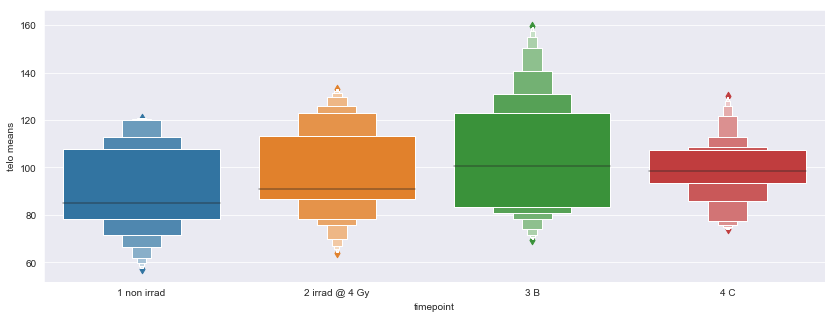

In [14]:
fig = plt.figure(figsize=(14,5))
sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df)

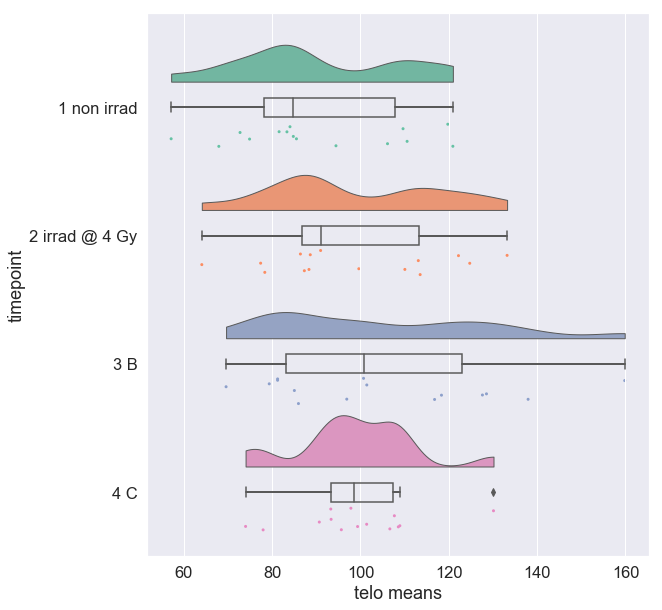

In [22]:
ax = sns.set(font_scale=1.5)
dx = "timepoint"; dy = "telo means"; ort = "h"; pal = "Set2"; sigma = .3
ax=pt.RainCloud(x = dx, y = dy, data = all_patients_df, palette = pal, bw = sigma, 
                 width_viol = .8, figsize = (9,10), move=0.21, orient = ort)

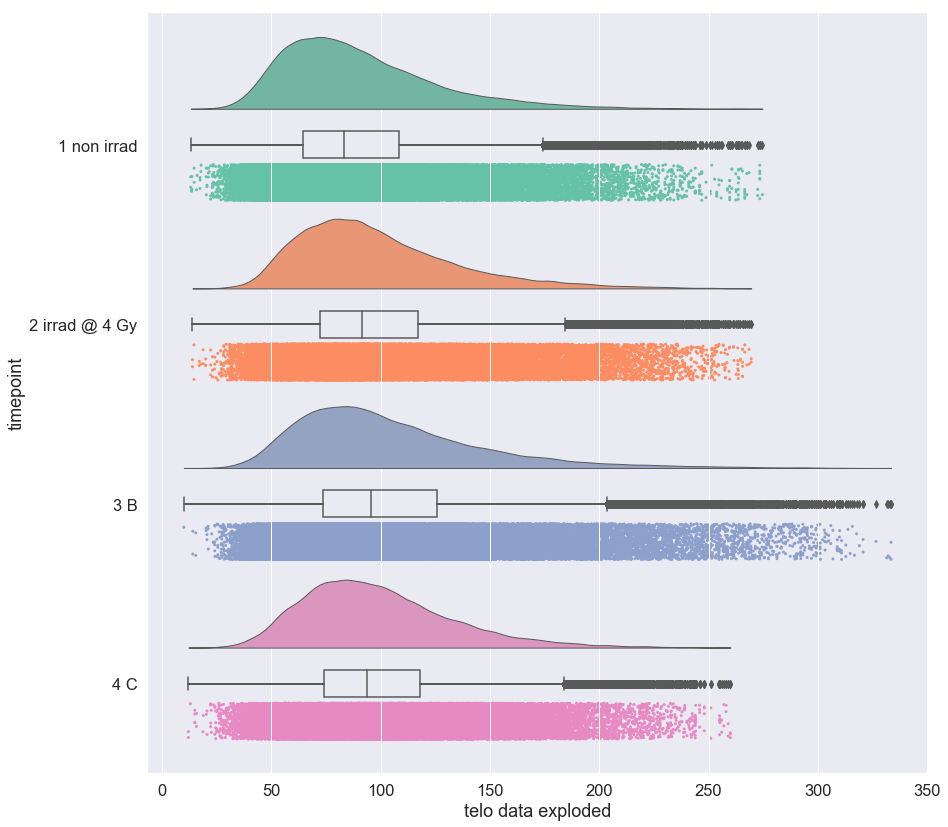

In [25]:
ax = sns.set(font_scale=1.5)
dx = "timepoint"; dy = "telo data exploded"; ort = "h"; pal = "Set2"; sigma = .08
ax = pt.RainCloud(x = dx, y = dy, data = exploded_telos_all_patients_df, palette = pal, bw = sigma, 
                 width_viol = .8, figsize = (14,14), move=0.21, orient = ort)
               

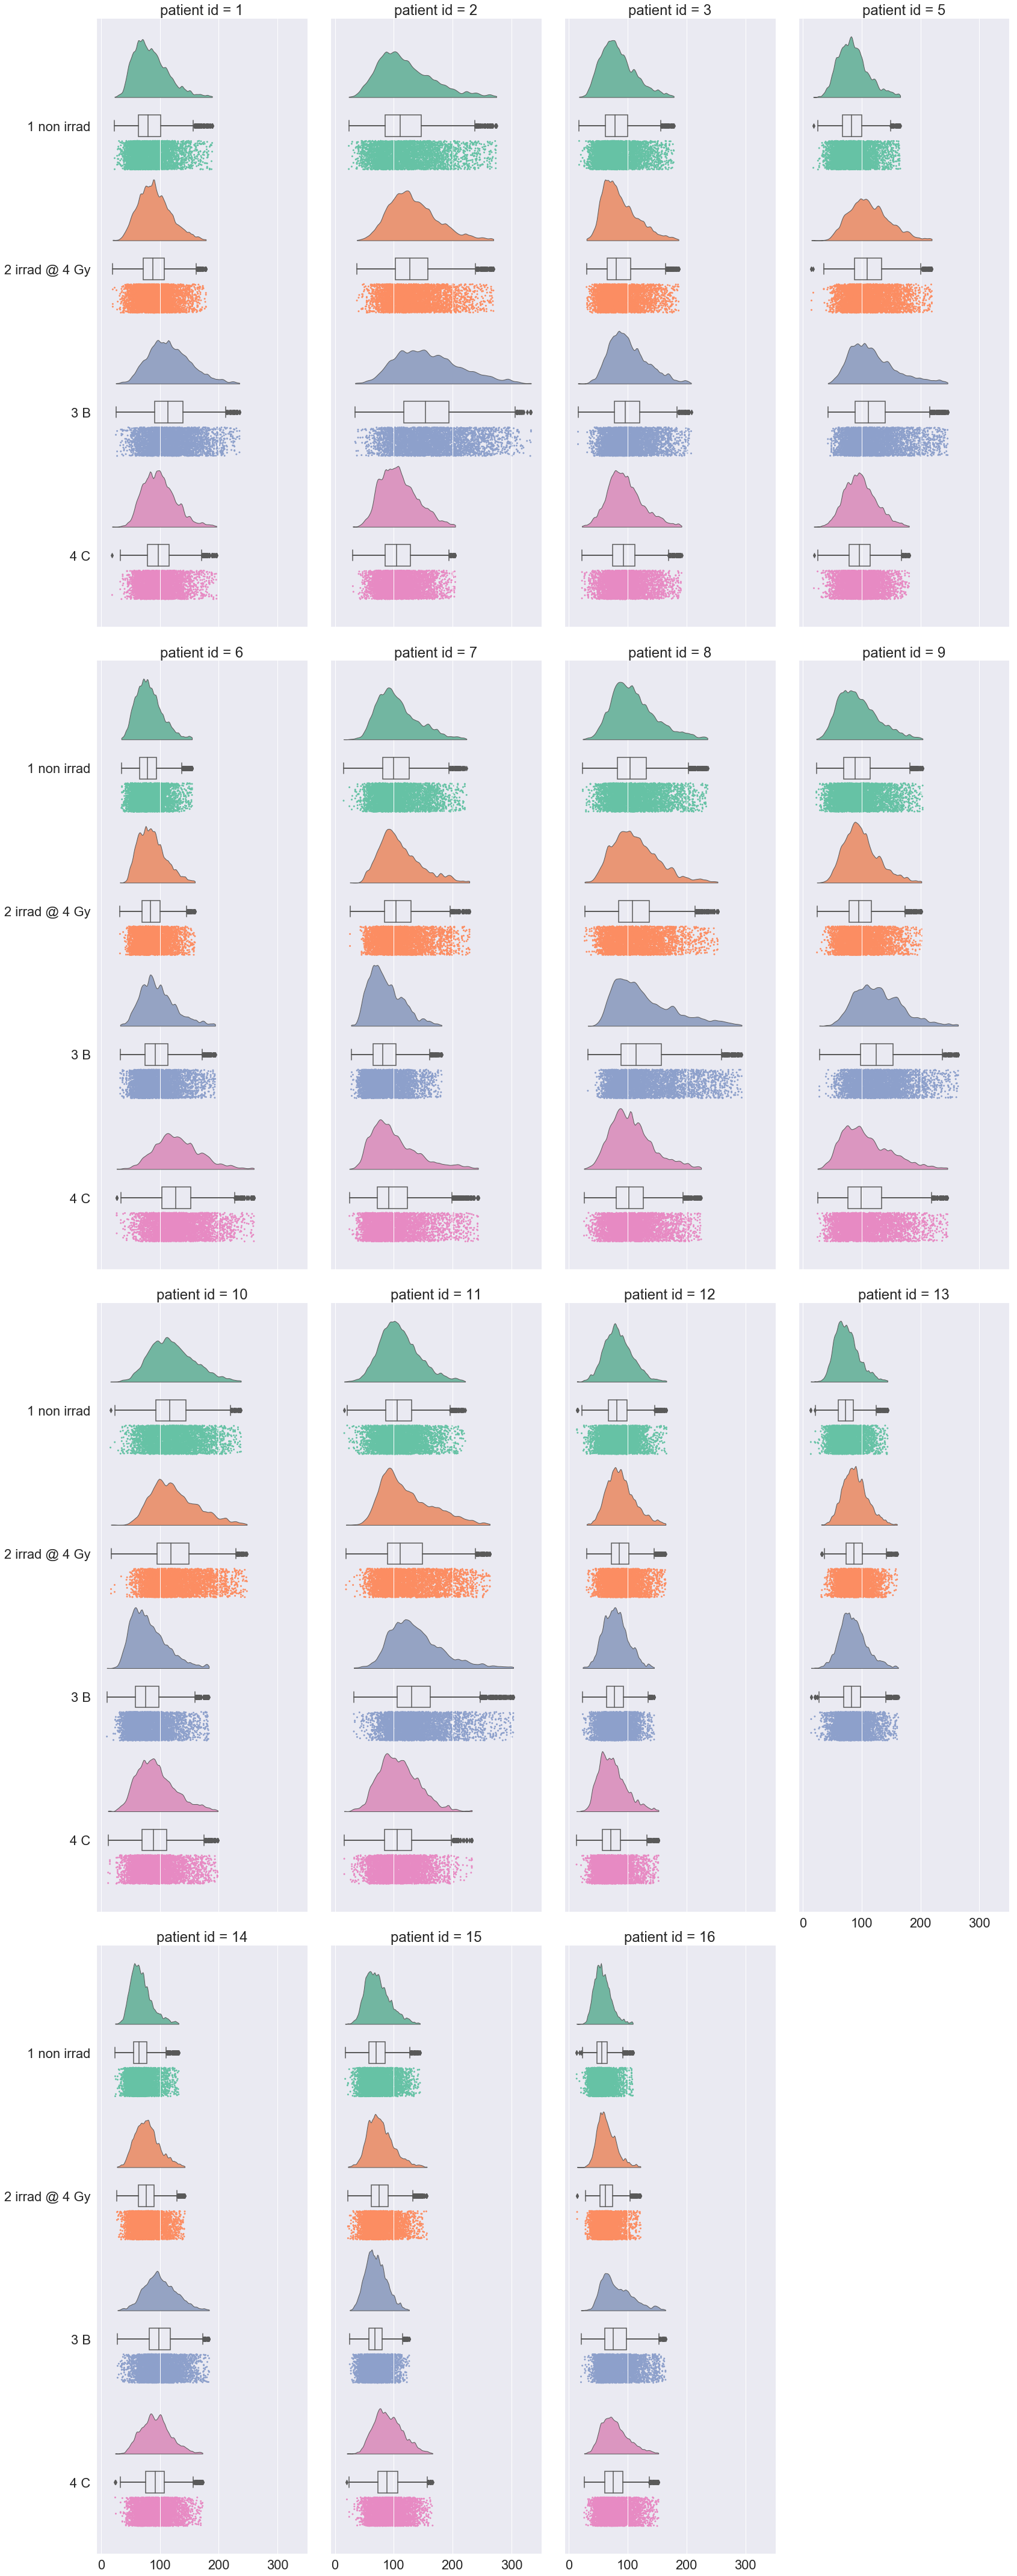

In [14]:
ax = sns.set(font_scale=2)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

#44,.7

sigma=0.08
g = sns.FacetGrid(exploded_telos_all_patients_df, col = "patient id", col_wrap=4, height=15, aspect=.4)
g = g.map_dataframe(pt.RainCloud, x = "timepoint", y = "telo data exploded", data = exploded_telos_all_patients_df, 
                    orient = "h", move=0.205, ax = g.axes, palette = "Set2", bw = sigma,
                   width_viol = .85) 

# ax = plt.subplots(figsize = (9,10))


In [36]:
# LARGER RAINCLOUD PLOTS FOR INDIVIDUAL PATIENTS 

# def raincloud_plot_astros_groups(x=None, y=None, data=None, 
#                                  groupby=None, iterable=None):
    
#     group_df = data.groupby(groupby)
    
#     for item in iterable:
#         plot_df = group_df.get_group(item)
##        plot_df[x]
# #         .cat.remove_unused_categories(inplace=True)
    
#         ax = sns.set(font_scale=1)
# #         dx = x; dy = y; ort = "h"; pal = "Set2"; sigma = .35
#         ax = pt.RainCloud(x = x, y = y, data = plot_df, palette = "Set2", bw = .20, 
#                      width_viol = .8, figsize = (10,10), move=0.21, orient = "h")
#         plt.title(f'{item} telos', fontsize=16)

        
# patient_ids = list(all_patients_df['patient id'].unique())
# raincloud_plot_astros_groups(x='timepoint', y='telo data exploded', data=exploded_telos_all_patients_df, 
#                              groupby='patient id', iterable=patient_ids)

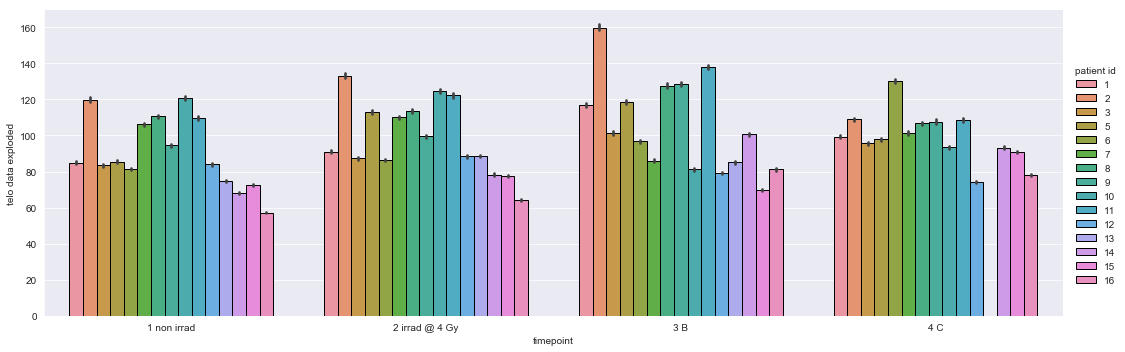

In [164]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='timepoint', y='telo data exploded', hue='patient id', kind='bar', height=5, aspect=3, data=exploded_telos_all_patients_df)

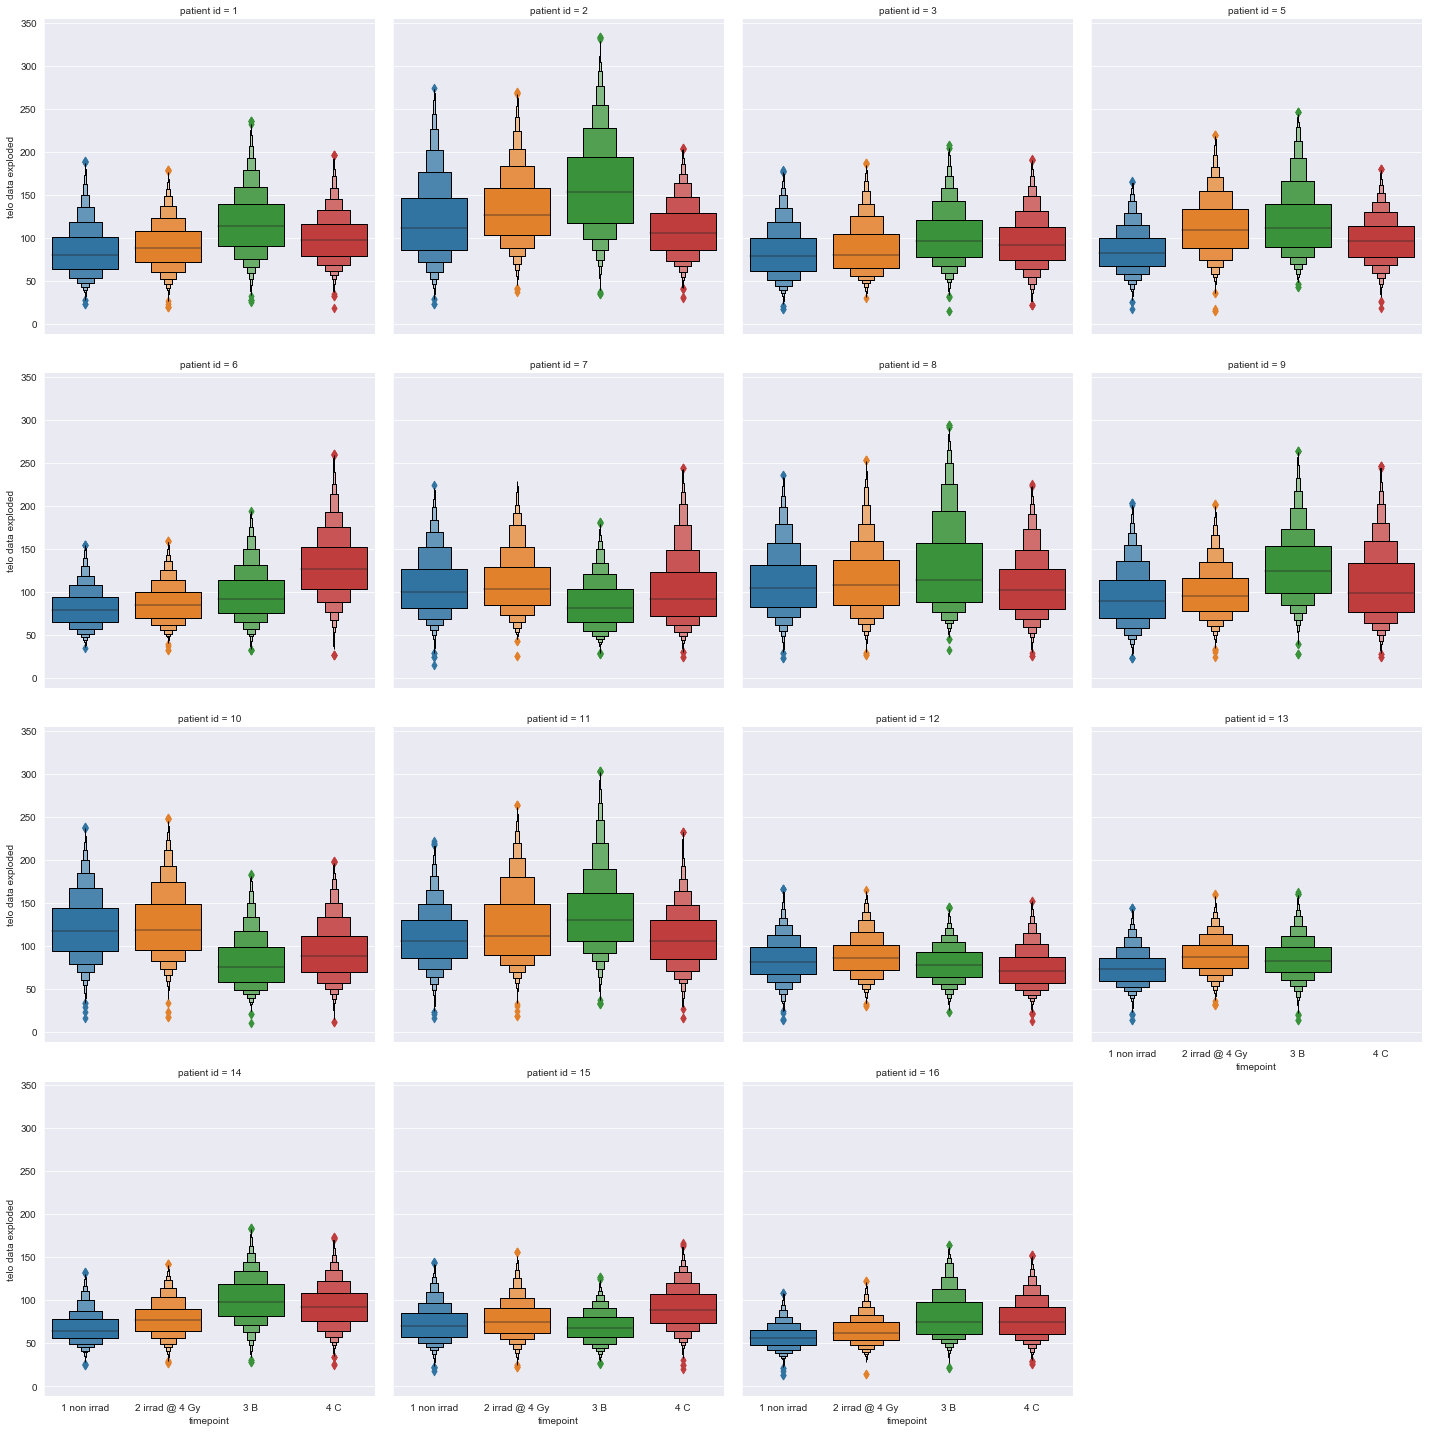

In [165]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='timepoint', y='telo data exploded', col='patient id', col_wrap=4, kind='boxen', data=exploded_telos_all_patients_df)

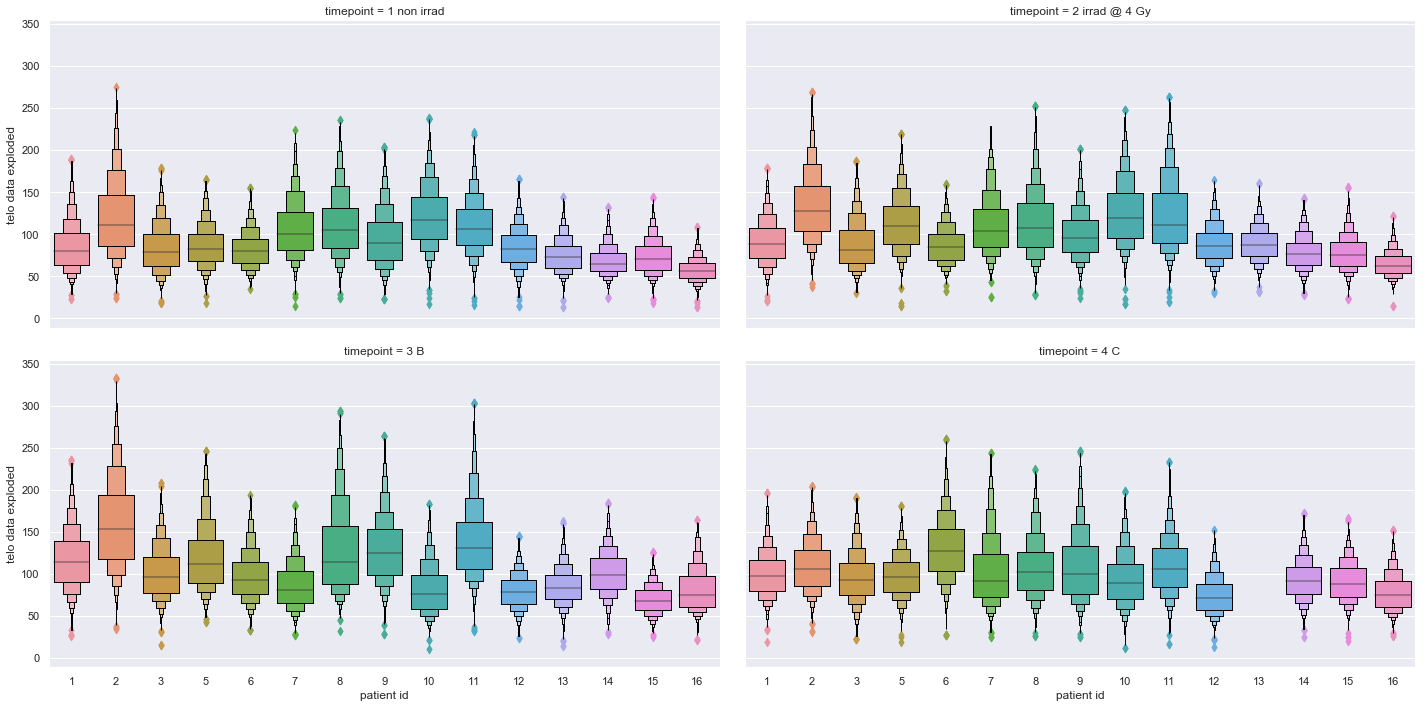

In [32]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='patient id', y='telo data exploded', col='timepoint', height=5, aspect=2, col_wrap=2, kind='boxen', data=exploded_telos_all_patients_df)
# plt.savefig(f'lynn suggestion.pdf')

Text(0, 0.5, 'Individual Telos Within Pre-Rad Therapy Time point Quartiles')

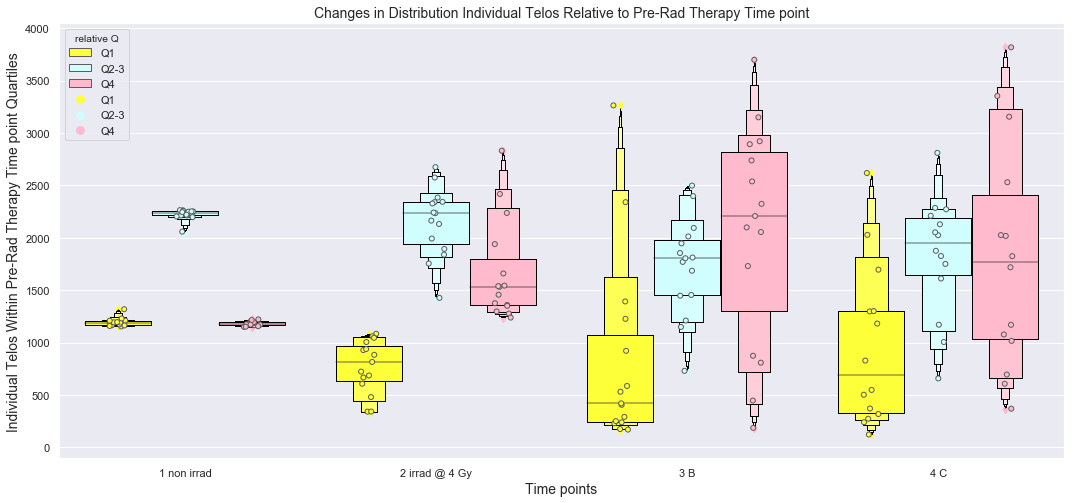

In [16]:
ax = sns.set(font_scale=1)
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)

# ax.set(xlabel='TESTING', ylabel='common ylabel')
# fig.ax.set(xlabel='ASD')

ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=14)
ax.set_xlabel('Time points', fontsize=14)
ax.set_ylabel('Individual Telos Within Pre-Rad Therapy Time point Quartiles', fontsize=14)

### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient

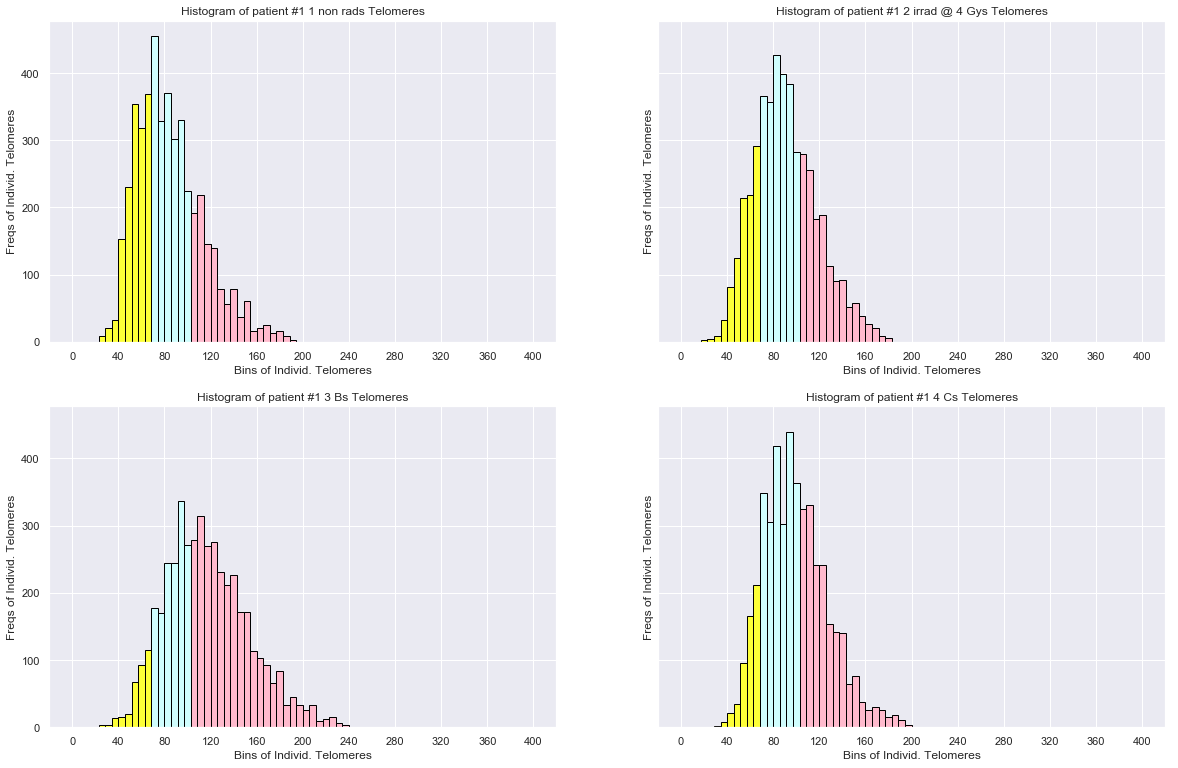

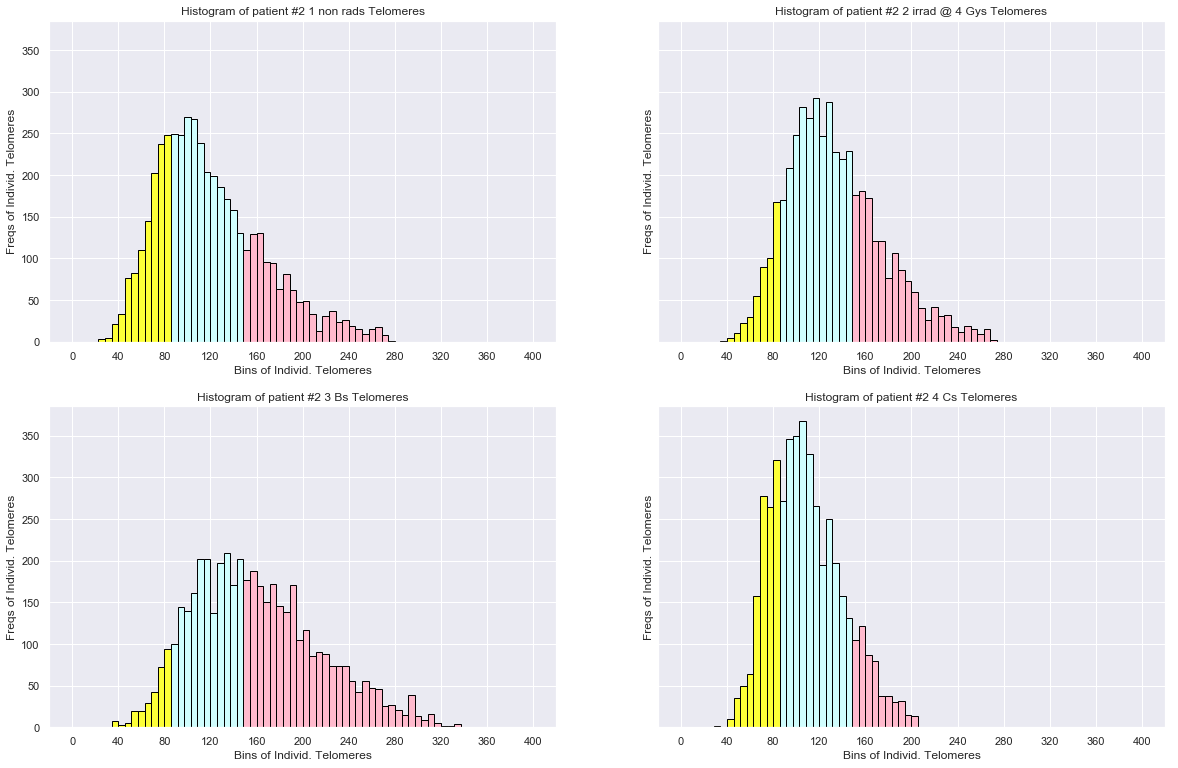

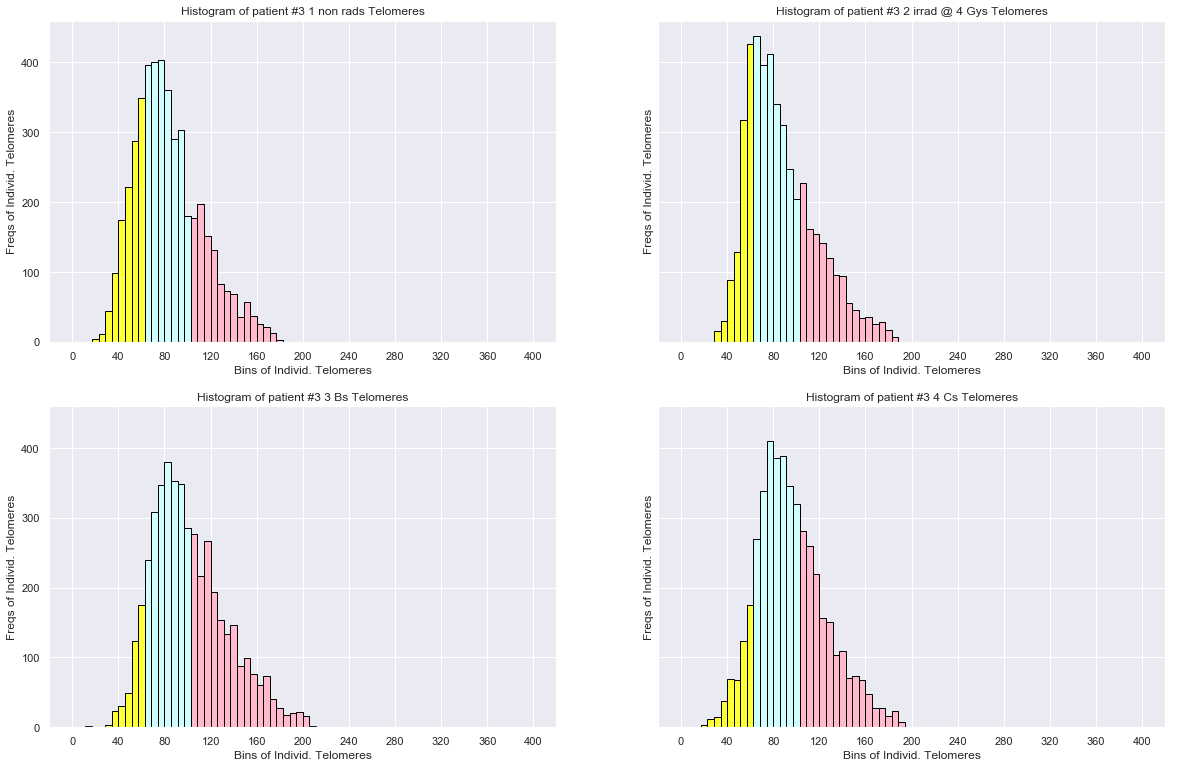

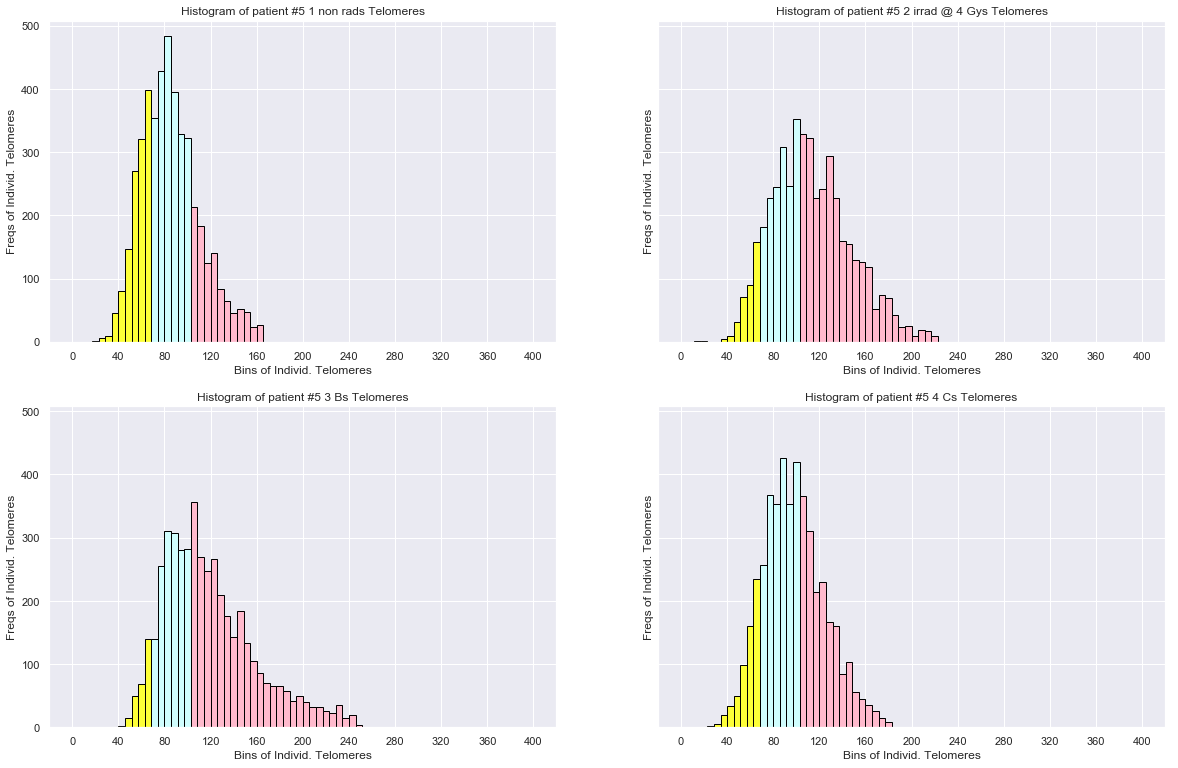

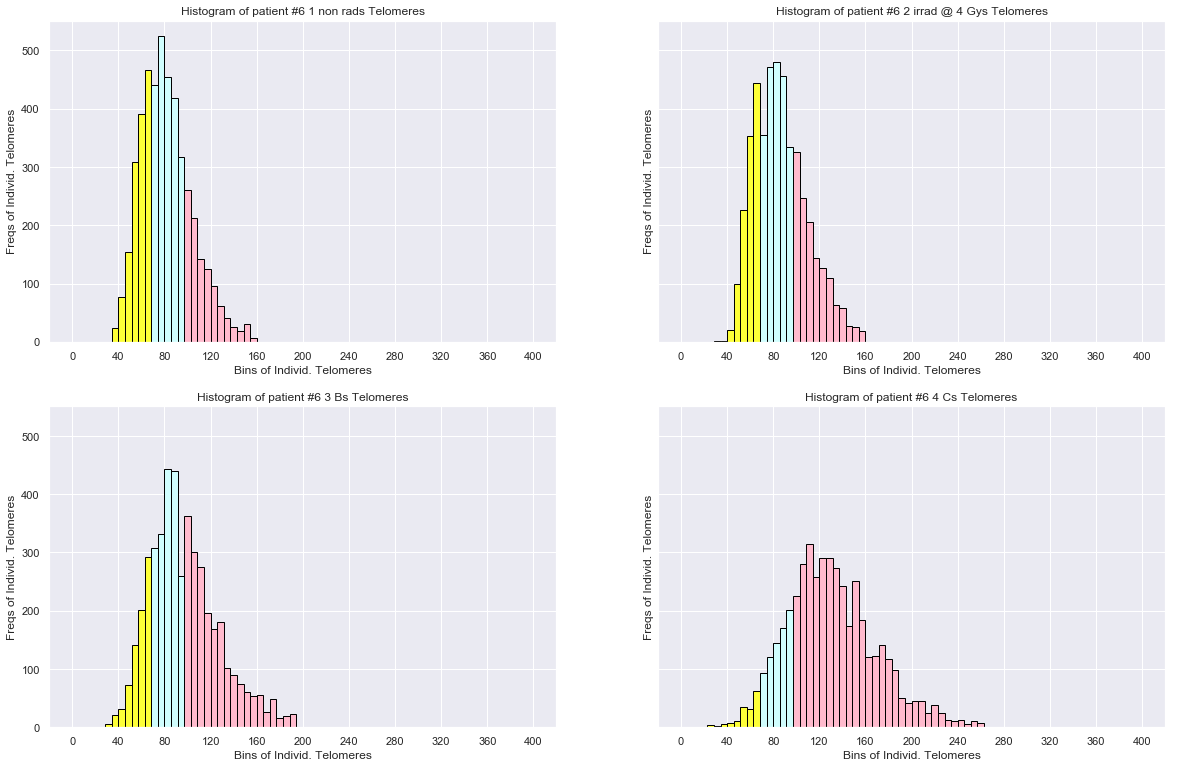

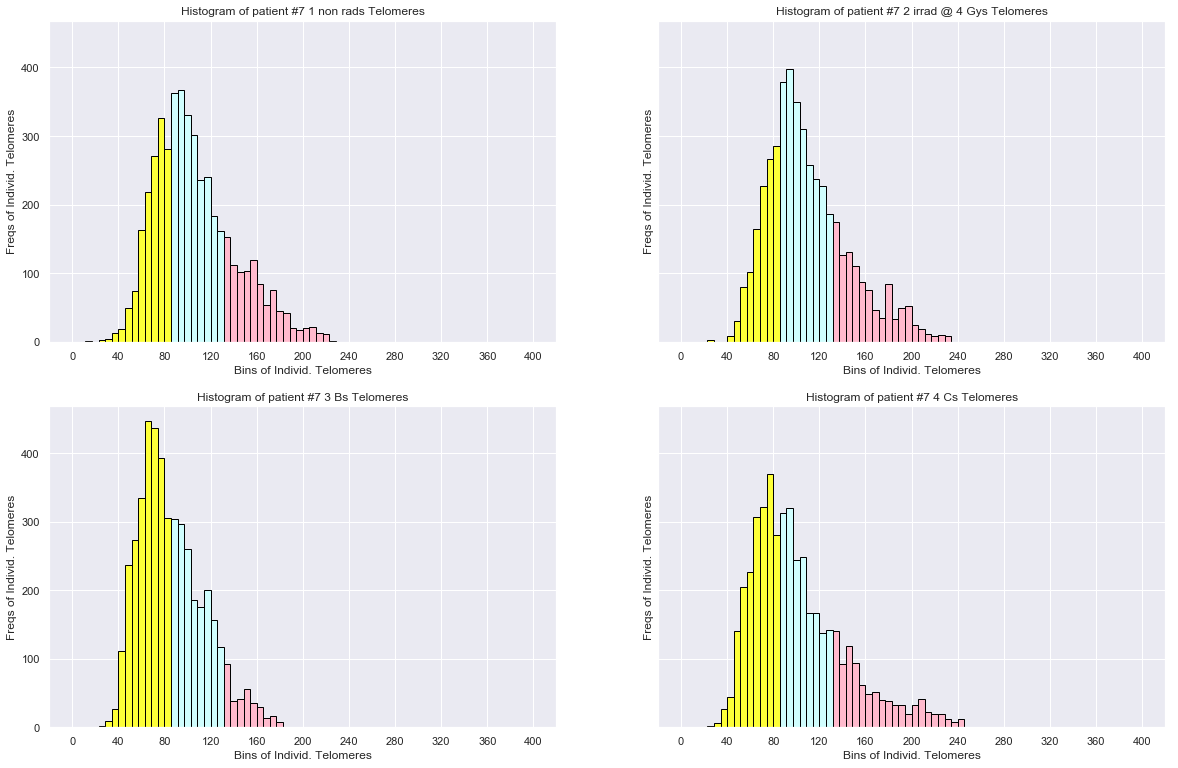

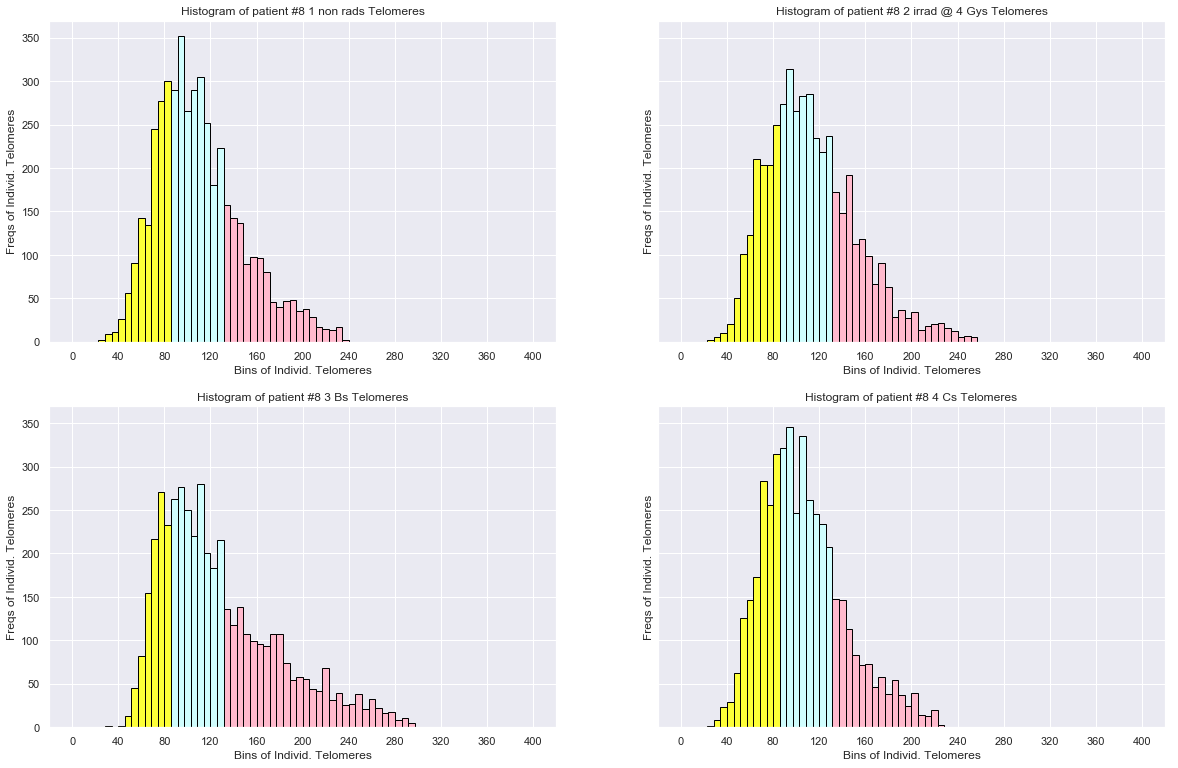

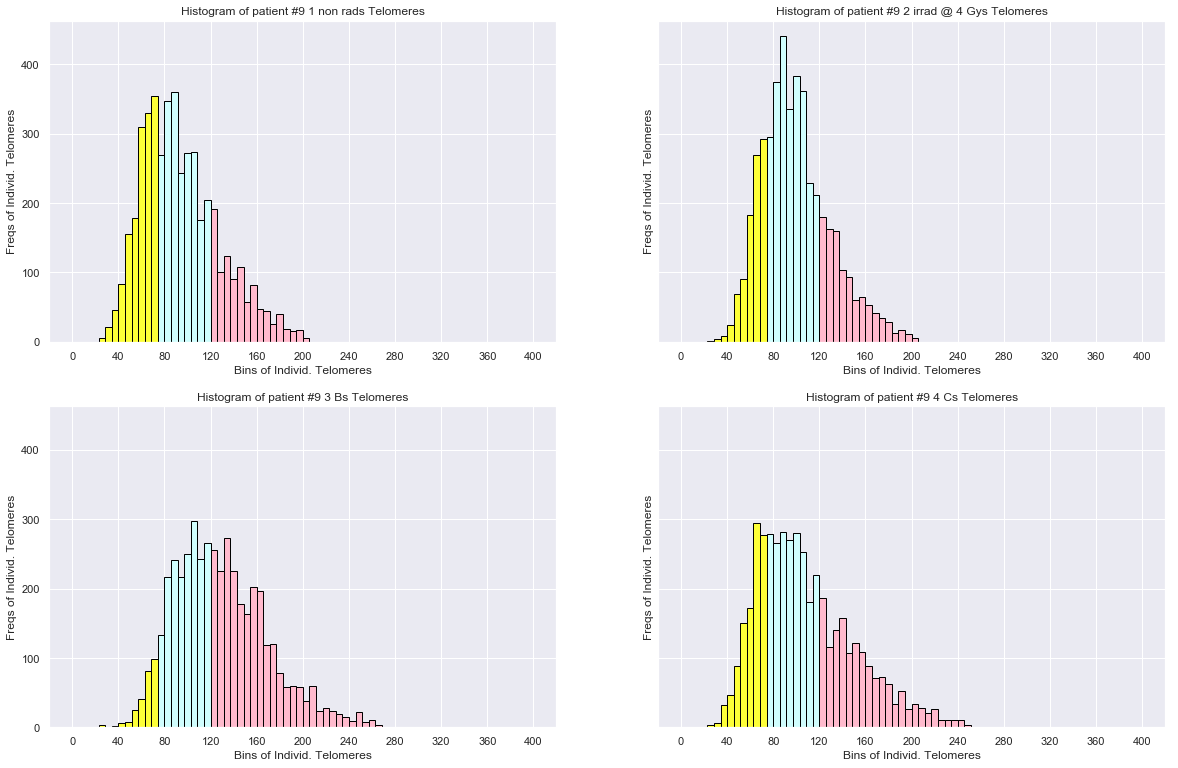

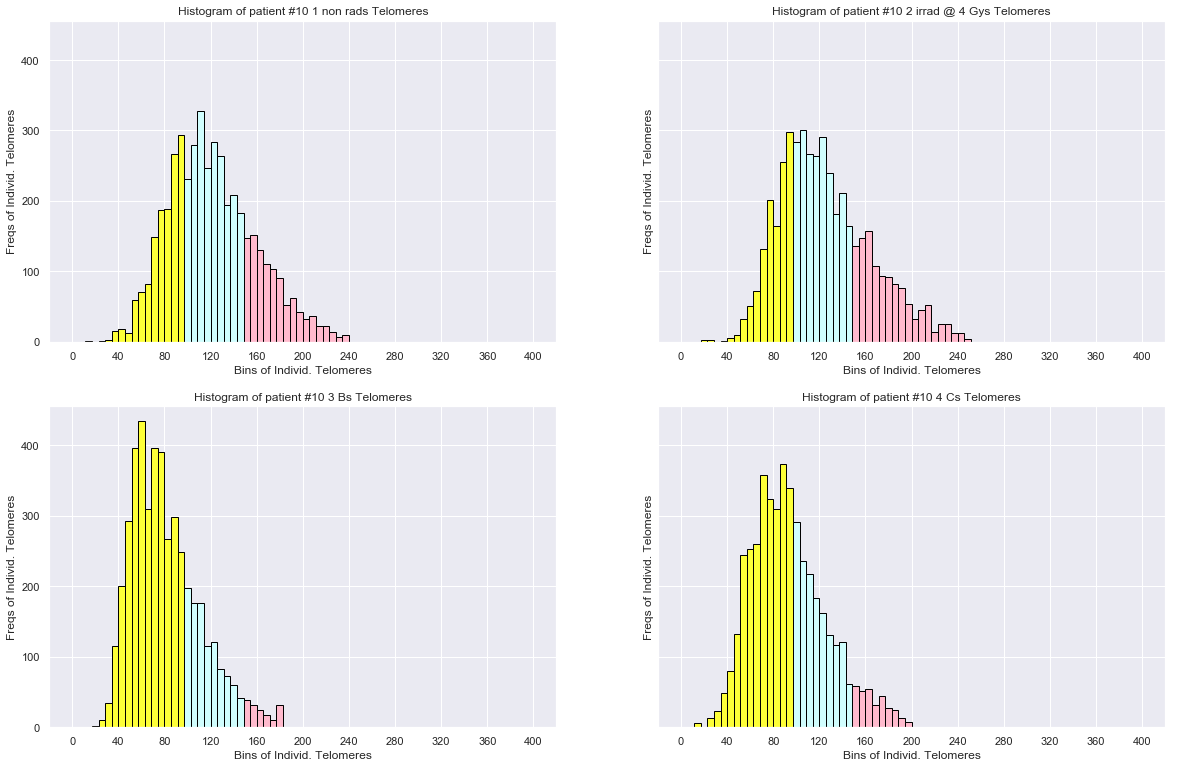

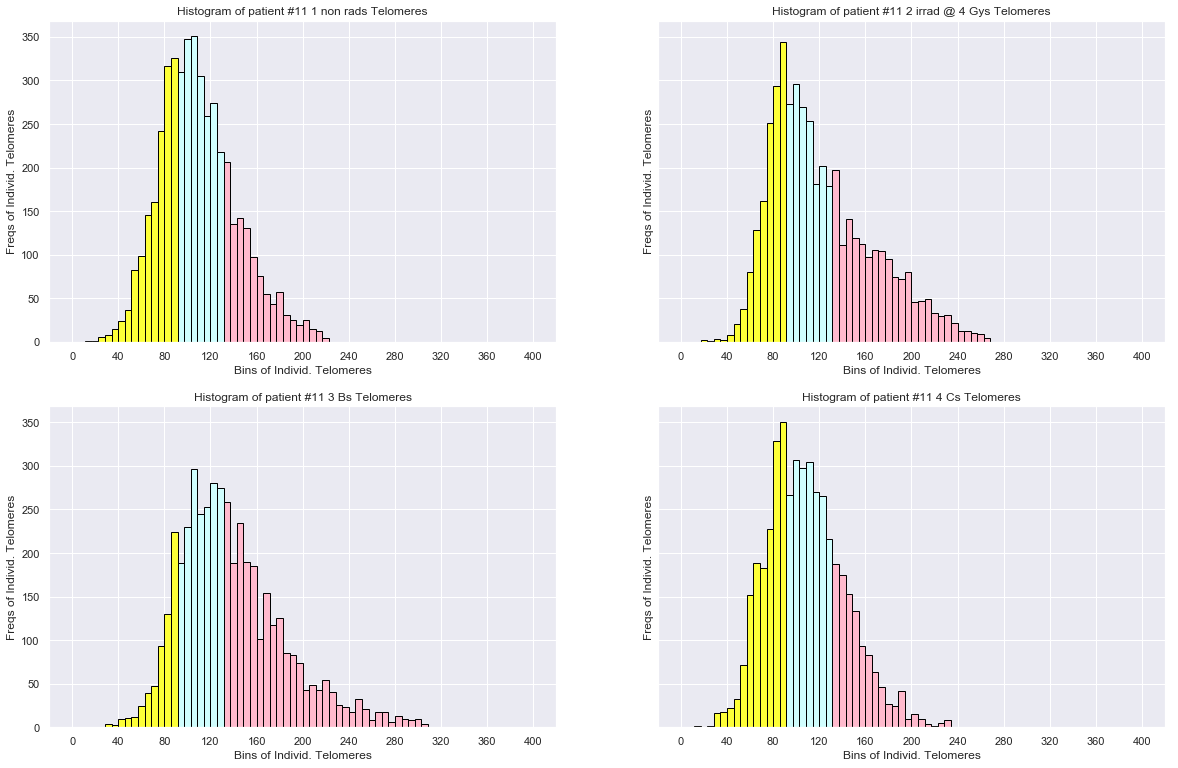

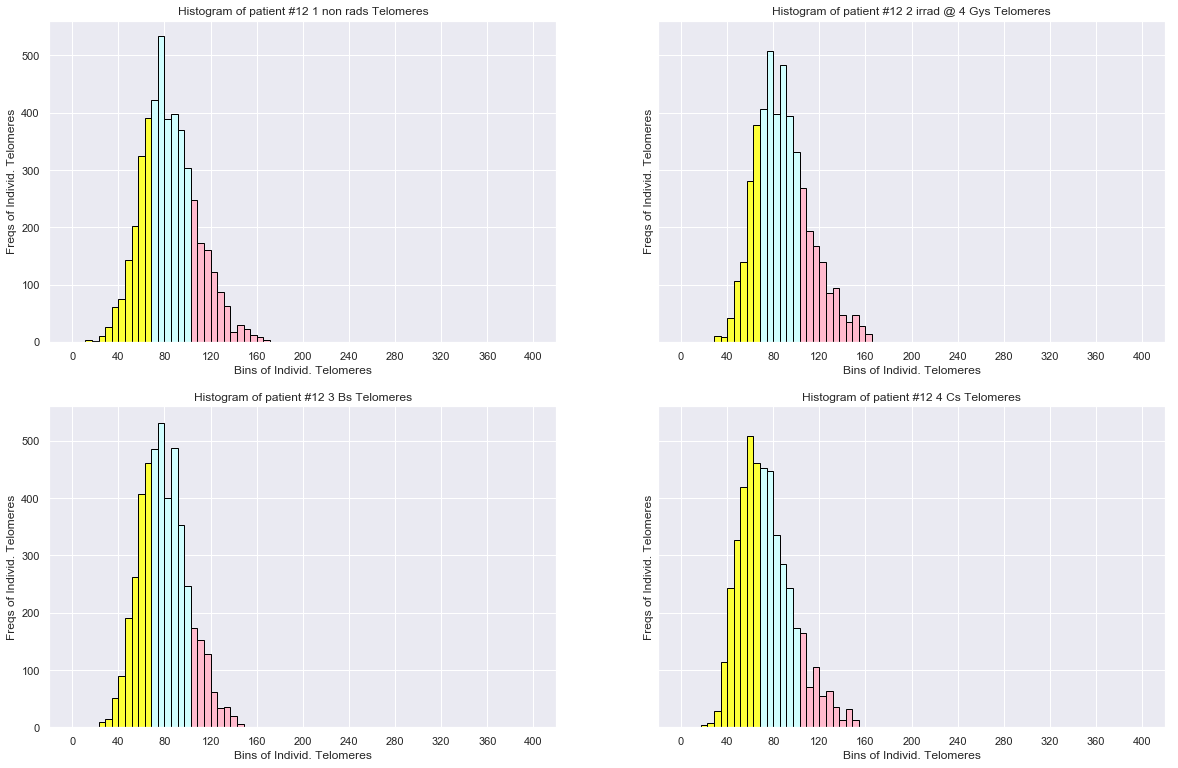

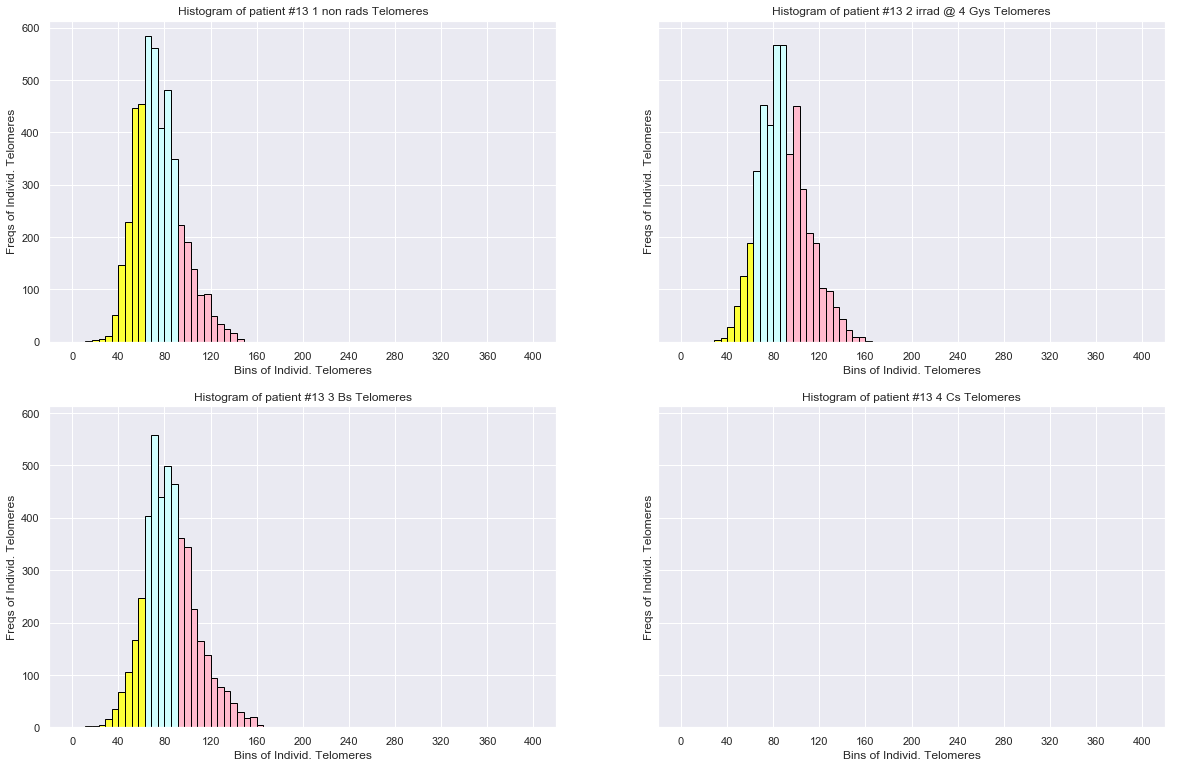

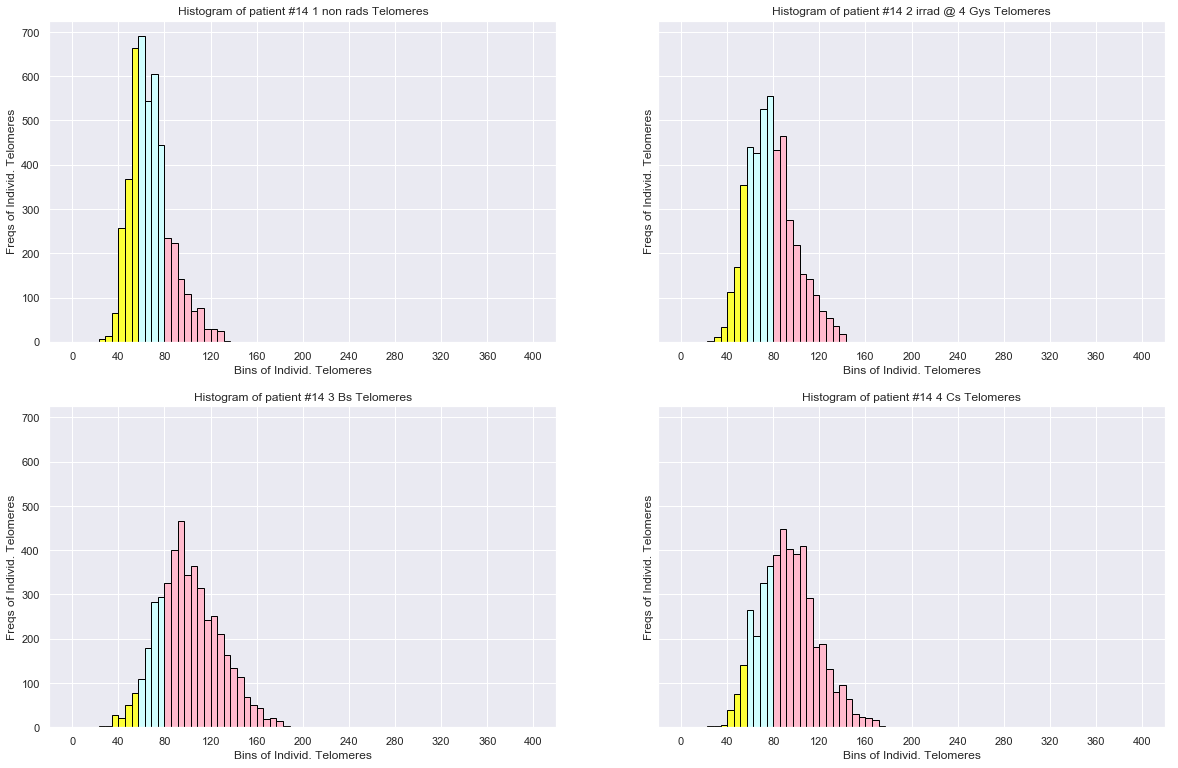

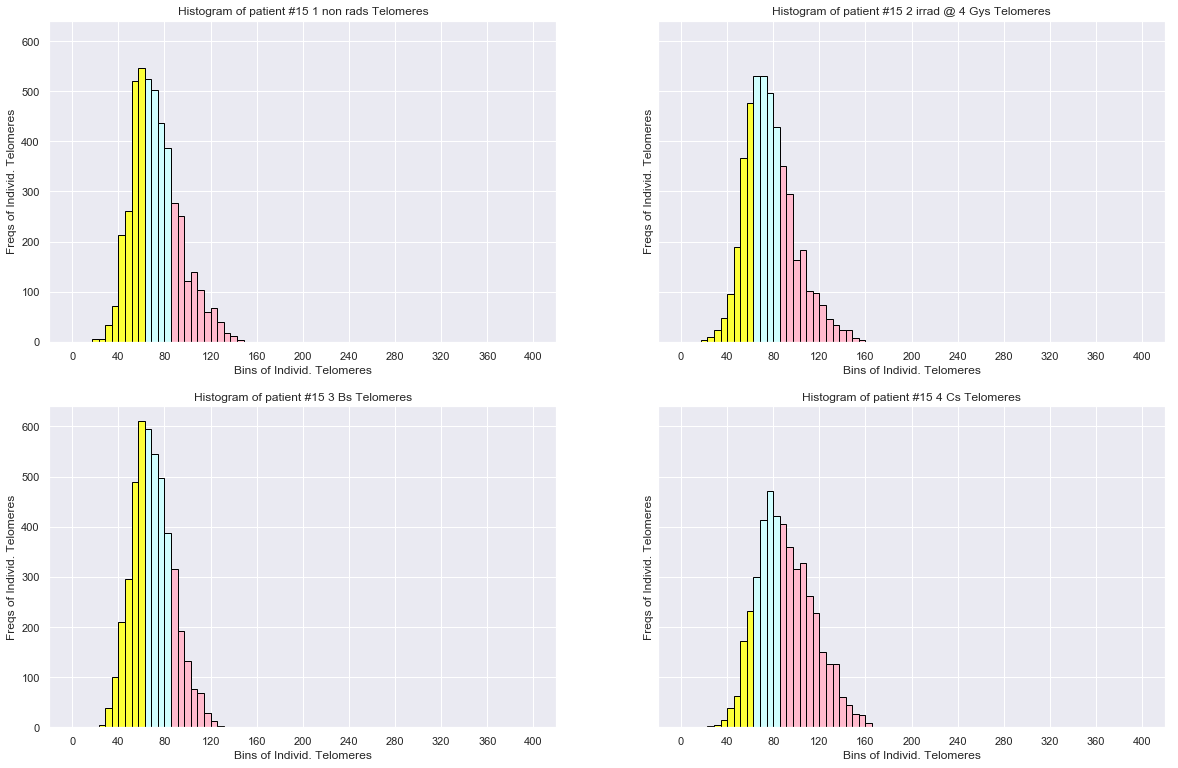

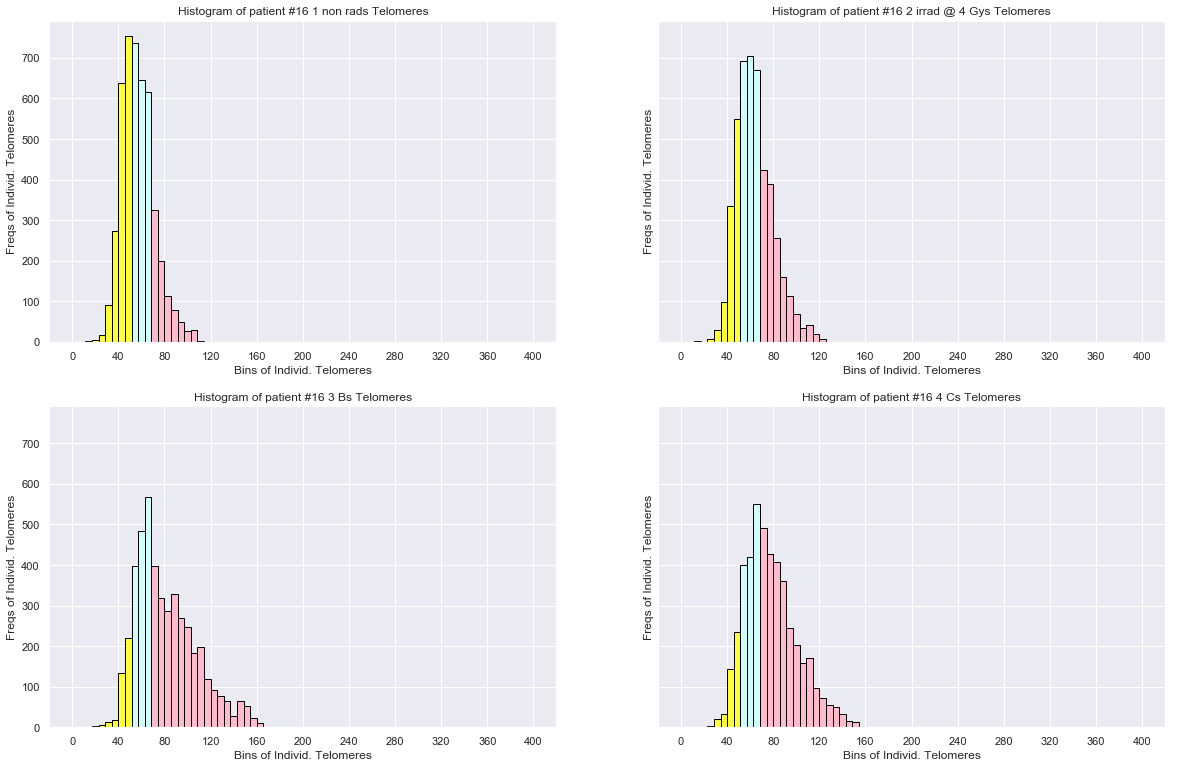

In [93]:
patient_ids = list(all_patients_df['patient id'].unique())
telo_mrp.histogram_plot_groups(x='telo data exploded', data=exploded_telos_all_patients_df, groupby='patient id', iterable=patient_ids)

In [86]:
# all_patients_df_origin = telo_mrp.generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, 'yes graphs')

In [ ]:
### function graveyard, pending deletion (since stored in a module!)

In [ ]:
# def generate_dictionary_from_TeloLength_and_Chr_aberr_Data(patharg):

#     """
#     opens raw telomere length count excel files from imageJ analyses and
#     extracts the individual mean telomere lengths to make histograms;
#     opens chromosome rearrangement frequency files and extracts data
#     both telos & chr rearrangement frequencies are stored as values to their
#     sample timepoint keys, which themselves are values to patient id# key

#     i.e the data structure is:

#     dict = {
#     patient_IDnumber = 
#     {SW#A non irrad: [telos data, chr aberr data], 
#     SW#A irrad @ 4 Gy: [telos data, chr aberr data]},

#     etc.
#     }

#     i.e:

#     all_patients_dict = {
#     '1' = {
#     'SW1A non irrad': ['telomere data', 'chr aberr data'],
#     'SW1A irrad @ 4 Gy': ['telomere data', ' chr aberr data']},

#     etc. for patients 1 - 16 (less #4 missing)
#     }

#     pass the directory where the telomere length excel files (.xlsx) are located
#     """

#     all_patients_dict = {}

#     for file in os.scandir(patharg):
#         if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
        
#             try:
#                 df = pd.read_excel(file)

#             except:
#                 print('File not found..')
#                 return -1

#             print(file.name, 'data extraction in progress..') 
# #                   'it works peggy!! <3 <3 !!')
           
#             if 'chr' not in file.name:
                
#                 telo_data = extract_and_clean_telos(df, file.name)

#             else:
#                 continue

#             file = file.name.replace('.xlsx', '').rstrip()
#             data_list = []
#             file_chr = ''

            
#             num, num2 = capture_patient_sample_ID(file)

#             if 'chr' in file:
#                 file_chr = file
#                 file = file.replace('chr','').rstrip()

#             if file[num:num2] not in all_patients_dict.keys():
#                 all_patients_dict[file[num:num2]] = {file: []}

#                 if len(all_patients_dict[file[num:num2]][file]) == 0:
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#                 elif len(all_patients_dict[file[num:num2]][file]) == 1:
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#             elif file[num:num2] in all_patients_dict.keys():
#                 if file in all_patients_dict[file[num:num2]]:
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()

#                 elif file not in all_patients_dict[file[num:num2]]:     
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()
                        
#     print('completed file collection')
#     return all_patients_dict

In [23]:
# def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):
#     #if wanted to do for max. possible telomeres, just replace the subtraction with max telos
#     # print('substracts second astro from first.. equalizing second to first')

#     if astro_df.size > 4600:
#         astro_dfsampled = astro_df.sample(4600)
#         return astro_dfsampled

#     if astro_df.size > 25 and astro_df.size <= 2300:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
#         concat_ed = pd.concat([rsampled, astro_df], sort=False)
#         np.random.shuffle(concat_ed.to_numpy())
#         concat_ed.reset_index(drop=True, inplace=True)
#         return concat_ed

#     if astro_df.size > 25 and astro_df.size < 4600:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         if option == 'rsamp':
#             rsampled = astro_df.sample(missing_data_difference, random_state=28)
#             concat_ed = pd.concat([rsampled, astro_df], sort=False)
#             np.random.shuffle(concat_ed.to_numpy())
#             concat_ed.reset_index(drop=True, inplace=True)
#             return concat_ed
#         else:
#             return astro_df
#     else:
#         return astro_df


In [24]:
# def histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

#         astroarray = astroDF.to_numpy()

#         N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroarray, bins=n_bins, range=(0, 400), edgecolor='black')

#         for a in range(len(patches)):
#             if bins[a] <= np.quantile(astroquartile, 0.25):
#                 patches[a].set_facecolor('#fdff38')

#             elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
#                 patches[a].set_facecolor('#d0fefe')

#             elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
#                 patches[a].set_facecolor('#d0fefe')

#             elif bins[a] > np.quantile(astroquartile, 0.75): 
#                 patches[a].set_facecolor('#ffbacd')


#         axs[axsNUMone,axsNUMtwo].set_title('Histogram of ' + astroname + 's Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [25]:
# def capture_patient_sample_ID(file):
#     """
#     # print(len('SW2A non irrad'),
# #       len('BJ1 for SW2_'),
# #       len('BJ-hTERT for SW2_'),
# #       len('SW10A non irrad'),
# #       len('BJ1 for SW10_'),
# #       len('BJ-hTERT for SW10_'),
# #       len('SW8B'),
# #       len('SW14B'),
# #       len('SW1A irrad @ 4 Gy'),
# #       len('SW12A irrad @ 4 Gy'))

# # 14 12 17 15 13 18 4 5 17 18

# empty = []
# for file in files:
#     num, num2 = capture_patient_sample_ID(file)
#     empty.append(file[num:num2])
# print(empty)

# # ['2', '2', '2', '10', '10', '10', '8', '15', '1', '12']
#     """

#     if len(file) == 14:
#         #it's patient id w/ 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 12:
#         #it's BJ1 ctrl w/ 1 sample ID digit
#         num = 10
#         num2 = num+ 1
#         return num, num2

#     elif 'hTERT' in file and len(file) == 17:
#         #it's BJ-hTERT w/ 1 sample digit
#         num = 15
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 15:
#         #it's patient id w/ 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

#     elif len(file) == 13:
#         #it's BJ1 ctrl w/ 2 sample ID digits
#         num = 10
#         num2 = num + 2
#         return num, num2

#     elif 'hTERT' in file and len(file) == 18:
#         # it's BJ-hTERT w/ 2 sample digits
#         num = 15
#         num2 = num + 2
#         return num, num2
    
#     elif len(file) == 4:
#         #it's 2nd/3rd patient timepoint w/ 1 sample digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif len(file) == 5:
#         #it's 2nd/3rd patient timepoint w/ 2 sample digits
#         num = 2
#         num2 = num + 2
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 17:
#         # irrad @ 4 Gy 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 18:
#         # irrad @ 4 Gy 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

In [26]:
# def extract_and_clean_telos(df, file_name):

#     df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
#     mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
#         1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
#         5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])

#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
#     meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
#     mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
#     mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
#     mean_individ_df.reset_index(drop=True, inplace=True)
    
#     if 'BJ1' not in file_name and 'hTERT' not in file_name:
#         telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]
#         return telo_data
#     else:
#         return mean_individ_df
    
 

In [27]:
# ### FIND QUARTILES OF NON IRRAD TIMEPOINT & MAKE BASELINE..
# ### find individual telomeres below the 0.25 percentile (a), between
# ### the 0.25 & 0.75 percentile (b), & above the 0.75 percentile (c)

# def quartile_cts_rel_to_df1(df1, df2):
#     df1 = pd.DataFrame(df1)
#     df2 = pd.DataFrame(df2)
    
#     quartile_1 = df2[df2 <= df1.quantile(0.25)].count()
    
#     quartile_2_3 = df2[(df2 > df1.quantile(0.25)) & (df2 < df1.quantile(0.75))].count()

#     quartile_4 = df2[df2 >= df1.quantile(0.75)].count()
    
#     return quartile_1.values, quartile_2_3.values, quartile_4.values

In [29]:
# def generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, graph_option='no graphs'):

#     data = []
#     print('To display graphs pass the value "yes graphs" to the functions argument "graph_option"',
#           'otherwise option="no graphs"')

#     for i in range(1,17):
#         if str(i) in all_patients_dict.keys():
#             for sample in sorted(all_patients_dict[str(i)].keys()):
#                 telos = all_patients_dict[str(i)][sample][0]
#                 # chr = all_patients_dict[str(i)[timepoint][1]
#                 chr_d = 'chr data'
#                 working_status = 'IT WORKS PEGGY <333'
            
        
#                 if 'hTERT' in sample:
#                     #average of all hTERT samples is 79.9762
#                     #CF = correction factor
#                     hTERT_avg = 79.9762
#                     hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
                
#                 elif 'BJ1' in sample:
#                     #average of all BJ1 samples is 69.5515
#                     #CF = correction factor
#                     BJ1_avg = 69.5515
#                     BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
#                     CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
            
#                 elif 'non irrad' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_A_nonRAD_name = sample
#                     SW_A_nonRAD = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 elif 'irrad @ 4 Gy' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_A_irrad4Gy_name = sample
#                     SW_A_irrad4Gy = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 elif 'B' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_B_name = sample
#                     SW_B = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '3 ' + 'B', telos_samp.multiply(CF_mean), chr_d, working_status])
                    
#                 elif 'C' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_C_name = sample
#                     SW_C = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '4 ' + 'C', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 else:
#                     print('error with making dataframe from dict..')
#                     print(sample)
#                     continue
            
#             if option == 'yes graphs':
                
#                 SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
#                 SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
#                 SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
#                 SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

#                 SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
#                 SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
#                 SW_Barray = SW_B_samp.to_numpy()
#                 SW_Carray = SW_C_samp.to_numpy()


#                 n_bins = 50
#                 fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=False, figsize=(20, 13))

#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

#                 if 'BJ1' not in sample and 'hTERT' not in sample:
#                     plt.savefig(f'SW{sample[2]}_histogram.pdf')
#                 plt.show()
            
#             else:
#                 continue
                
    
#     all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'chr data', 'status'])
#     all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
#     all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
#     all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
#     all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
#     all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
#     all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

#     return all_patients_df

In [ ]:
# ### LOOP THROUGH DATAFRAME FOR EACH PATIENT, ESTABLISH BASELINE QUARTILES FOR INDIVIDUAL TELOMERES USING NON IRRAD 
# ### SAMPLE TIMEPOINT.. THEN DETERMINES FOR EACH TIMEPOINT (irrad 4 Gy, B, C) HOW MANY TELOMERES REMAIN IN THOSE 
# ### QUARTILES... FILLS OUT Q1, Q2-3, Q4 COLUMNS..

# def calculate_apply_teloQuartiles_dataframe(all_patients_df):
    
#     q1_row, q2_3_row, q4_row = 6, 7, 8

#     for i, row in all_patients_df.iterrows():
#         if 'non irrad' in row[1]:
#             nonRAD = row[2]
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, nonRAD))

#         elif 'irrad @ 4 Gy' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         elif 'B' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         elif 'C' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         else:
#             print('unknown label in row[1] of the all patients df.. please check patient timepoint names')
            
#     return all_patients_df

In [ ]:
# ### working on incorporating function to get cells per individual

# def test_generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, option='no graphs'):

#     data = []
#     print('To display graphs pass the value "yes graphs" to the function',
#           'otherwise default option="no graphs"')

#     for i in range(1,17):
#         if str(i) in all_patients_dict.keys():
#             for sample in sorted(all_patients_dict[str(i)].keys()):
#                 telos = all_patients_dict[str(i)][sample][0]
#                 # chr = all_patients_dict[str(i)[timepoint][1]
#                 chr_d = 'chr data'
#                 working_status = 'IT WORKS PEGGY <333'
            
        
#                 if 'hTERT' in sample:
#                     #average of all hTERT samples is 79.9762
#                     #CF = correction factor
#                     hTERT_avg = 79.9762
#                     hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
                
#                 elif 'BJ1' in sample:
#                     #average of all BJ1 samples is 69.5515
#                     #CF = correction factor
#                     BJ1_avg = 69.5515
#                     BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
#                     CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
            
#                 elif 'non irrad' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_A_nonRAD_name = sample
#                     SW_A_nonRAD = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp, individ_cells, chr_d, working_status])

#                 elif 'irrad @ 4 Gy' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_A_irrad4Gy_name = sample
#                     SW_A_irrad4Gy = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp, individ_cells, chr_d, working_status])

#                 elif 'B' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_B_name = sample
#                     SW_B = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '3 ' + 'B', telos_samp, individ_cells, chr_d, working_status])
                    
#                 elif 'C' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_C_name = sample
#                     SW_C = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '4 ' + 'C', telos_samp, individ_cells, chr_d, working_status])

#                 else:
#                     print('error with making dataframe from dict..')
#                     print(sample)
#                     continue
            
# #             if option == 'yes graphs':
                
# #                 SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
# #                 SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
# #                 SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
# #                 SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

# #                 SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
# #                 SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
# #                 SW_Barray = SW_B_samp.to_numpy()
# #                 SW_Carray = SW_C_samp.to_numpy()


# #                 n_bins = 50
# #                 fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=False, figsize=(20, 13))

# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

# #                 if 'BJ1' not in sample and 'hTERT' not in sample:
# #                     plt.savefig(f'SW{sample[2]}_histogram.pdf')
# #                 plt.show()
            
# #             else:
# #                 continue
                
    
#     all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'cell data', 'chr data', 'status'])
#     all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
#     all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
#     all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
#     all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
#     all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
#     all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

#     return all_patients_df, telos_samp

#### Graveyard for analyses on mean telomere lengths of individual cells
#### didn't work out.. *maybe* could do clustering on means of cells per patient..? (see hexbin plot), not sure...


##### Making a dataframe for means of individual cells

In [195]:
# might be important for nasa astro bar graphs

# # shape (51, 56)

# all_patients_df_copy = all_patients_df.drop([44, 45, 46], axis=0)

# #taking all_patients_df, removing the index & making a multi index of patient id and timepoint
# individ_cell_cols = all_patients_df_copy.reindex().set_index(['patient id', 'timepoint']) 

# #removing unnecessary columns
# individ_cell_cols.drop(['chr data', 'telo data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

# #exploding the series containing the individual telos
# explode_cells = individ_cell_cols['cell data'].apply(pd.Series)

# #transpose!
# explode_cells = explode_cells.reset_index(level=['patient id']).T

# print(explode_cells.shape)
# explode_cells.head(5)

In [197]:
# X = explode_cells_4_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
# X = np.log(X)

# y = explode_cells_4_cols['4 C']
# y = np.log(y)

# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # # # # # Print out the statistics
# model.summary()

In [21]:
# playing with data.. OBJECTIVES: keras.. jointplots..
# https://towardsdatascience.com/quantile-regression-from-linear-models-to-trees-to-deep-learning-af3738b527c3
# https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

# X = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
# print(X.shape)
# y = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, 1)
# print(y.shape)

# # X = np.log(X)
# # y = np.log(y)

# features = pd.DataFrame(X, columns=['1 non irrad', '2 irrad @ 4 Gy', '3 B'])
# target = pd.DataFrame(y, columns=['4 C'])

# exploded_telos_4_cols = features.merge(target, left_index=True, right_index=True)
# sns.jointplot(x='2 irrad @ 4 Gy', y='4 C', kind='hex', color='tab:pink', data=exploded_telos_4_cols)

In [294]:
### linear regression between ... individual telos quantified for in vitro vs in vivo response 

### omnibus is super high.. pretty sure linear regression between individual telos is inappropriate

# X = explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:].values.reshape(-1,1)
# y = explode_individ_telos_cols['3 B'].iloc[1:].values.reshape(-1,1)

# model = sm.OLS(y, X).fit(random_state=1)
# predictions = model.predict(X) # make the predictions by the model

# # # # Print out the statistics
# model.summary()

In [40]:
### machine learning models.. between ... individual telos of timepoints vs. mean of 3 mths after therapy?

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error
# from xgboost import XGBRegressor
# from sklearn.metrics import explained_variance_score
# from sklearn.metrics import median_absolute_error

In [52]:
#automating application
# the means of timepoints are ordered.. therefore the linear regression approaches seem appropriate

# the individual telomere length measurements / cell means are NOT ordered.. therefore 
# linear regression / XGboost / random forest may be inappropriate..
# i need to research machine learning approaches for unstructured/un ordered data 

# X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].values.reshape(14, 3)
# y = pivot_all_patients_df['4 C'].values.reshape(-1, )

# X2 = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
# y2 = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, )


# models = [XGBRegressor, RandomForestRegressor]
# data_X = [X, X2]
# data_y = [y, y2]


# concat_list = []
# for X, y in zip(data_X, data_y):    
    
#     score_df, score_list = telo_mrp.score_model_accuracy_metrics(models, X, y)
    
#     if concat_list == []:
#         concat_list = score_list
#     else:
#         concat_list = concat_list + score_list
    
# pd.DataFrame(concat_list, columns=['model', 'model name', 'mean absolute error', 'explained variance'])

,model,model name,mean absolute error,explained variance
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",<class 'xgboost.sklearn.XGBRegressor'>,3.604786,0.273782
1,"(DecisionTreeRegressor(criterion='mse', max_de...",<class 'sklearn.ensemble.forest.RandomForestRe...,4.284393,0.189489
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",<class 'xgboost.sklearn.XGBRegressor'>,26.006472,0.037674
3,"(DecisionTreeRegressor(criterion='mse', max_de...",<class 'sklearn.ensemble.forest.RandomForestRe...,26.672518,-0.012759
